# CLUSTERING ANALYSIS 

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")

In [40]:
#Load dataset
#Dataset is in excel form 
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

# Data Preprocessing:

In [41]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [43]:
#Handle missing values 
# Check for missing values
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [46]:
var_1 = data.iloc[:, :6]  # First 6 columns
var_2 = data.iloc[:, 6:] #next six column

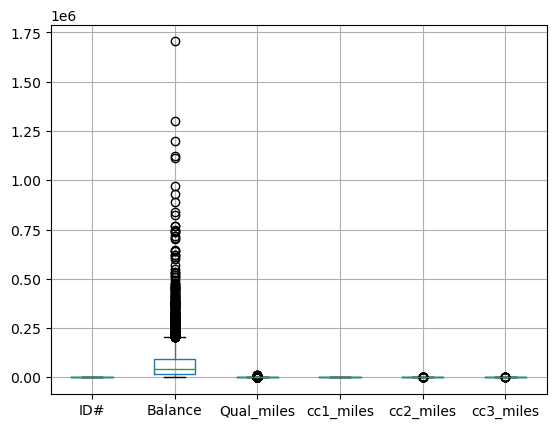

In [47]:
var_1.boxplot()
plt.show() 

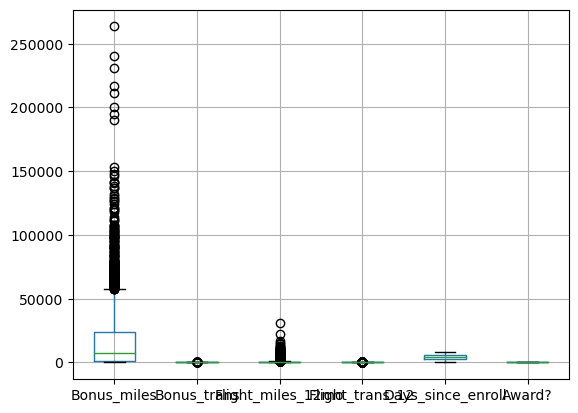

In [48]:
var_2.boxplot()
plt.show() 

In [49]:
# Remove outliers
# Fetch all column name
features = data.columns.tolist()
features

['ID#',
 'Balance',
 'Qual_miles',
 'cc1_miles',
 'cc2_miles',
 'cc3_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12',
 'Days_since_enroll',
 'Award?']

In [50]:
#Calculate IQR
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3 - Q1

In [51]:
for col in features:
    # Lower outliers (values below Q1 - 1.5 * IQR)
    data[col] = np.where(data[col] < (Q1[col] - 1.5 * IQR[col]), Q1[col] - 1.5 * IQR[col], data[col])
    
    # Higher outliers (values above Q3 + 1.5 * IQR)
    data[col] = np.where(data[col] > (Q3[col] + 1.5 * IQR[col]), Q3[col] + 1.5 * IQR[col], data[col])

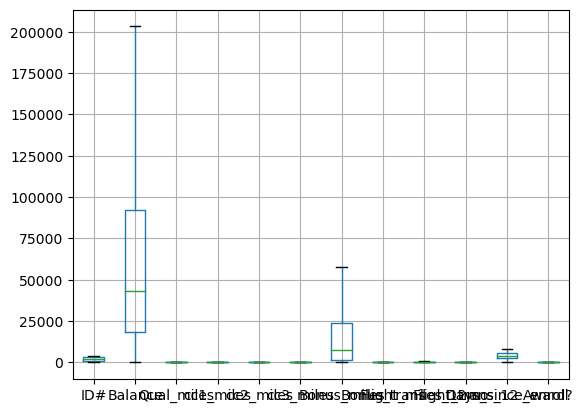

In [52]:
data.boxplot()
plt.show() 

In [53]:
# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [54]:
scaled_data

array([[-1.73512503, -0.60725829,  0.        , ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-1.73426342, -0.75894657,  0.        , ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-1.73340181, -0.38206963,  0.        , ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 1.72682006,  0.1675298 ,  0.        , ..., -0.62614341,
        -1.31560393,  1.30391816],
       [ 1.72768167, -0.15118775,  0.        , ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [ 1.72854328, -1.03556163,  0.        , ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

<Figure size 1100x800 with 0 Axes>

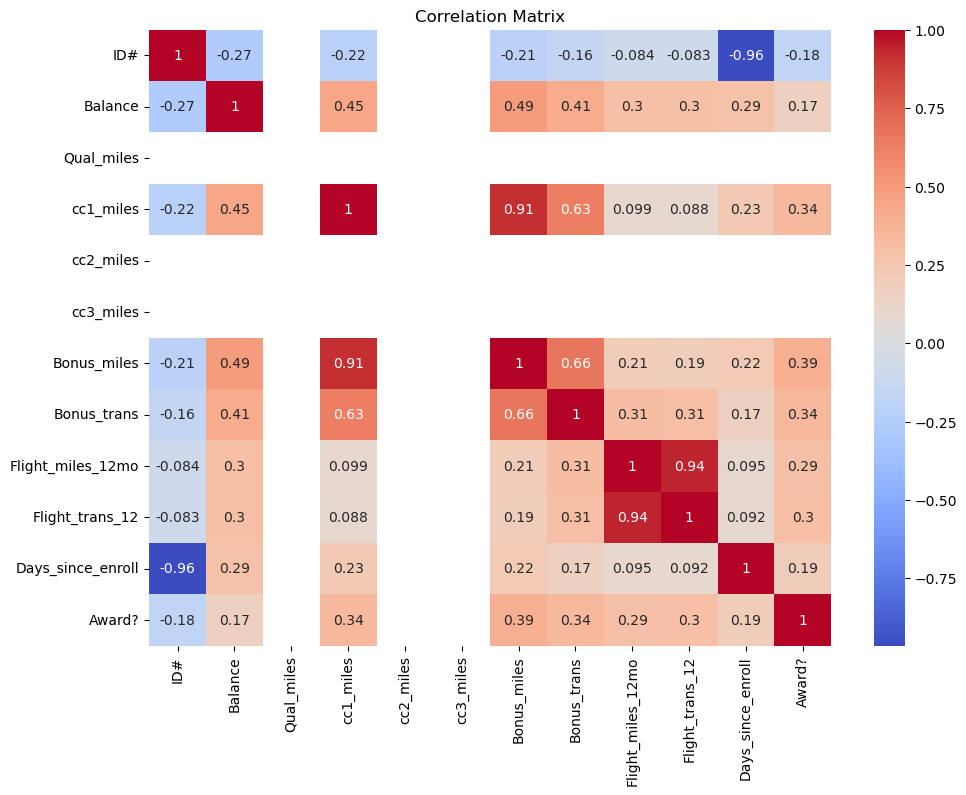

In [57]:
scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns)

# Compute and plot the correlation matrix
plt.figure(figsize=(11, 8))
sns.heatmap(scaled_data_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [58]:
scaled_data_df = scaled_data_df.drop(columns=['Qual_miles', 'cc2_miles', 'cc3_miles'])

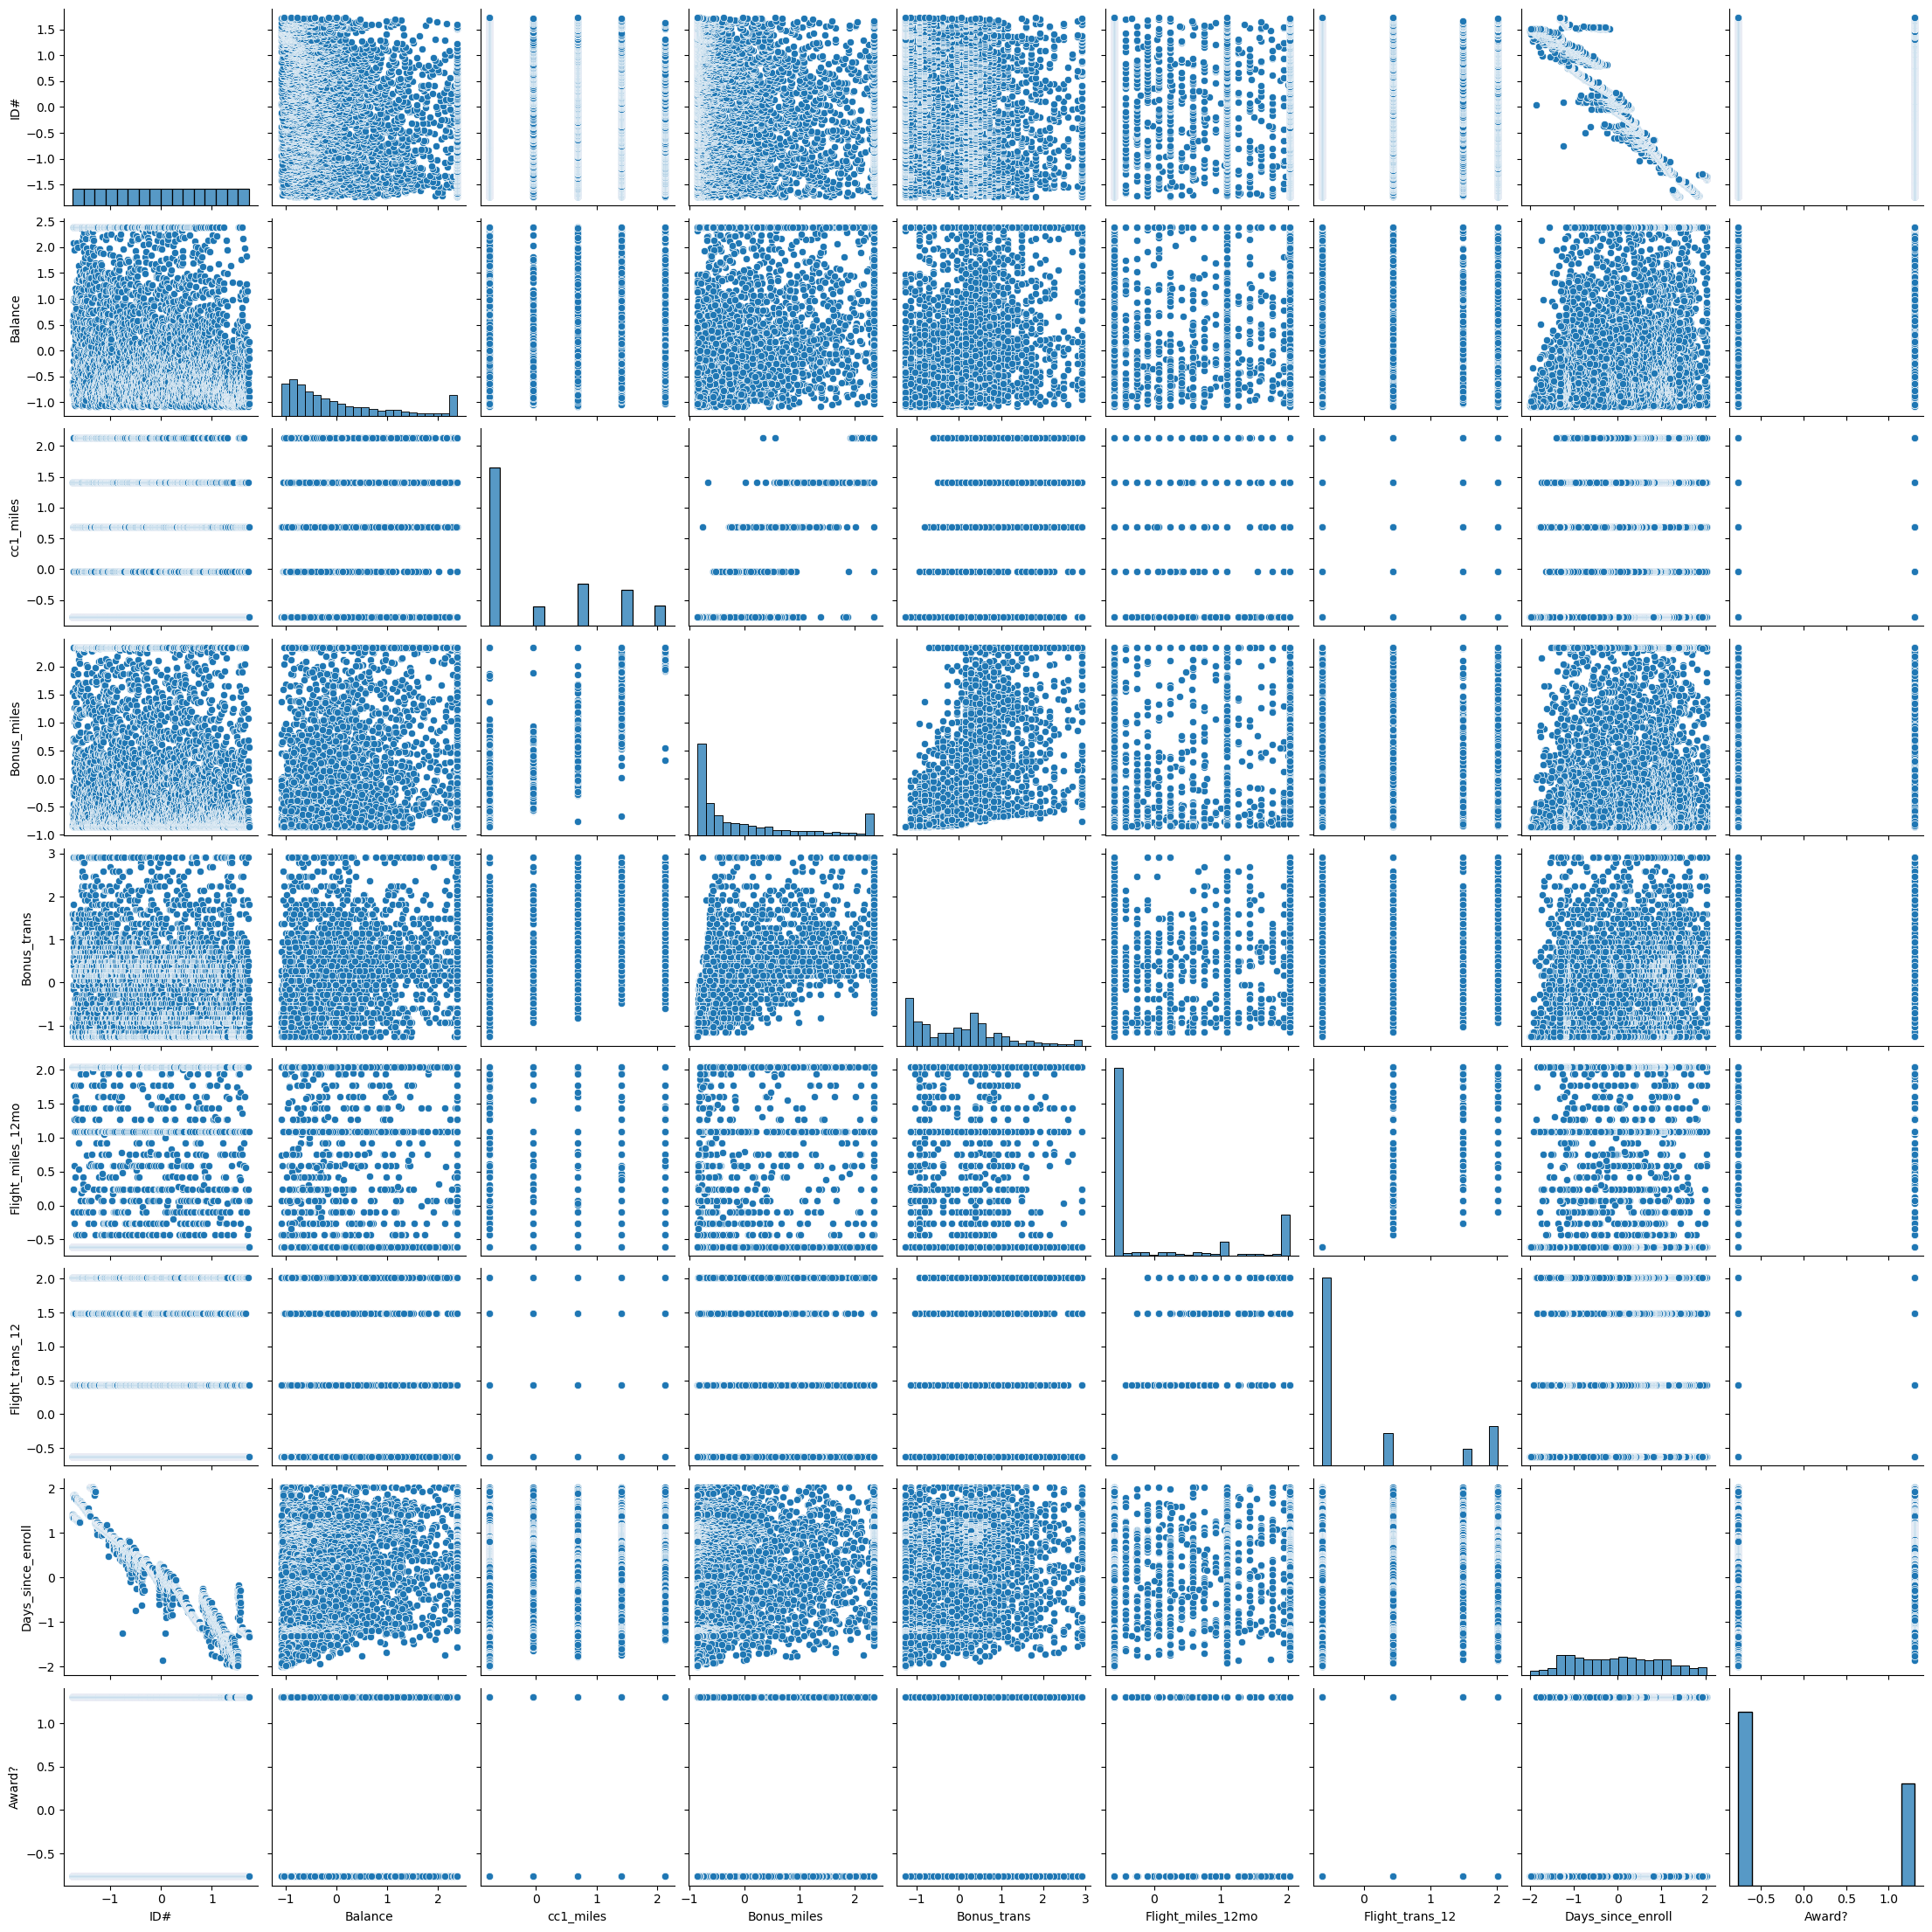

In [59]:
sns.pairplot(scaled_data_df)
plt.show()

# Implementing Clustering Algorithms:

# K-Means Clustering

In [62]:
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0) 
    kmeans.fit(scaled_data_df) 
    wcss.append(kmeans.inertia_)

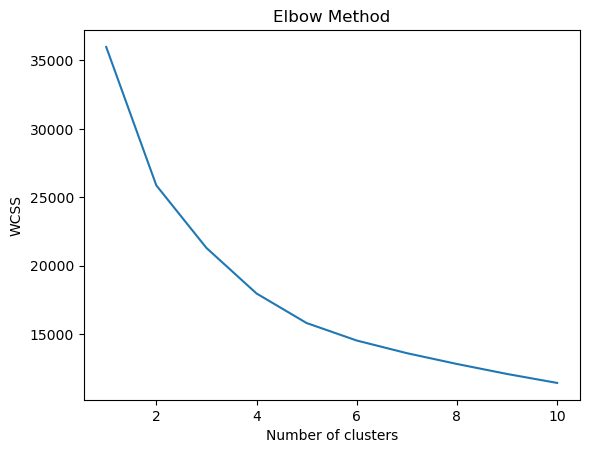

In [63]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#  Hierarchical Clustering

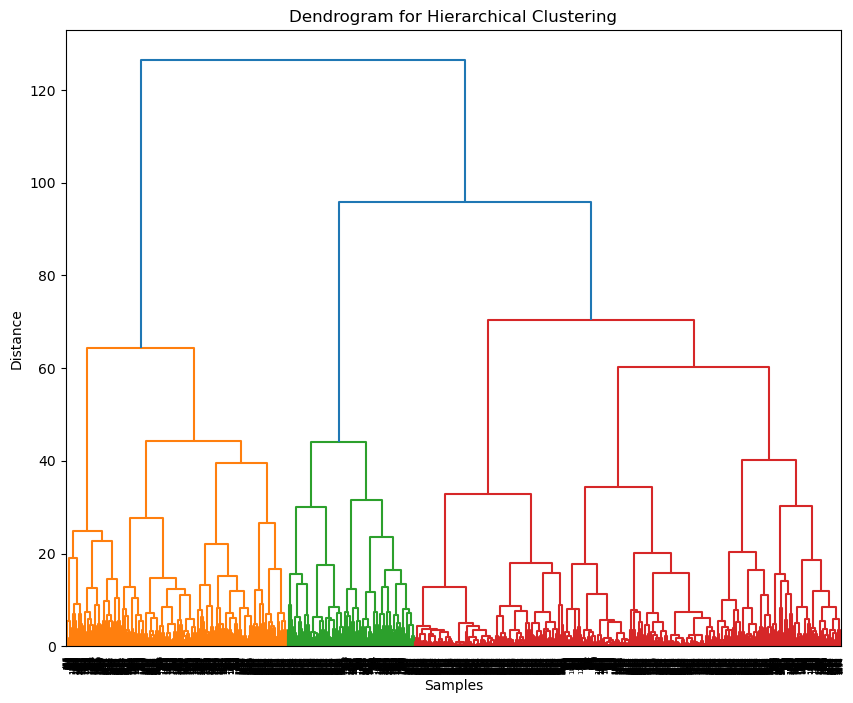

In [112]:
# Hierarchical Clustering
new = linkage(scaled_data_df, method='ward')
plt.figure(figsize=(10, 8))
dendrogram(new)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# DBSCAN 

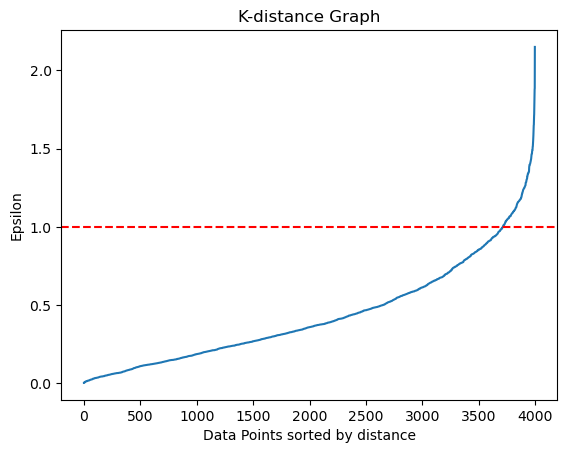

In [129]:
# Find optimal epsilon using NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
nn.fit(scaled_data_df)
distances, indices = nn.kneighbors(scaled_data_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.axhline(y=1, linestyle = '--', color='red')
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

# Visualization:

<Figure size 800x500 with 0 Axes>

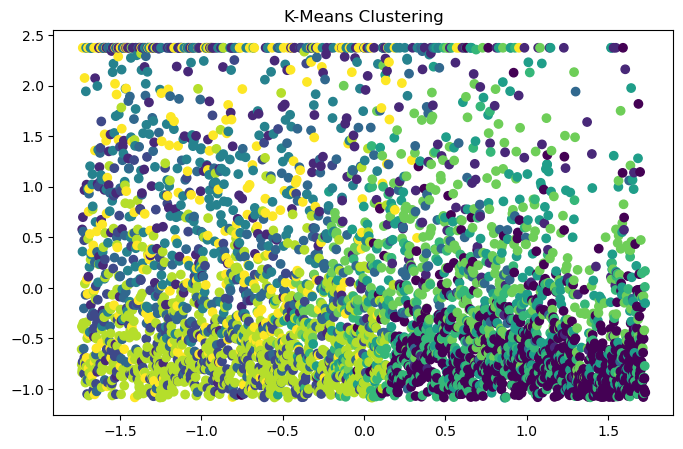

In [133]:
# Visualize clusters for K-Means
plt.figure(figsize=(8, 5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()

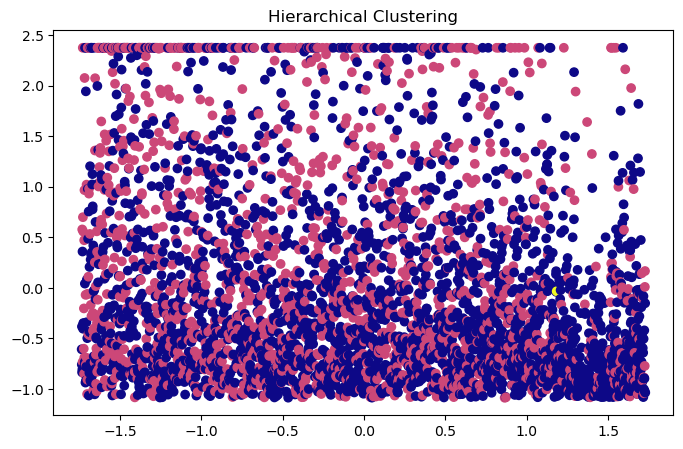

In [136]:
# Visualize clusters for Hierarchical
plt.figure(figsize=(8, 5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='plasma')
plt.title("Hierarchical Clustering")
plt.show()

<Figure size 800x500 with 0 Axes>

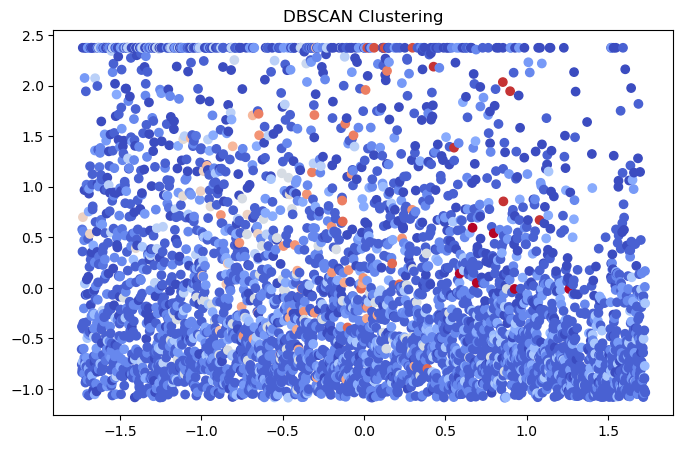

In [135]:
# Visualize clusters for DBSCAN
plt.figure(figsize=(8, 5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='coolwarm')
plt.title("DBSCAN Clustering")
plt.show()

# Evaluation and Performance Metrics:

In [115]:
# silhouette score for k-means
wcss = [] 
silhouette_scores = []

In [116]:
for i in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0) 
    kmeans_labels = kmeans.fit_predict(scaled_data_df)  # Get cluster labels

    # Append WCSS (Within-Cluster Sum of Squares)
    wcss.append(kmeans.inertia_)

    # Calculate silhouette score for the current K
    silhouette_avg = silhouette_score(scaled_data_df, kmeans_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for K={i}: {silhouette_avg}")

Silhouette Score for K=2: 0.29332609097426016
Silhouette Score for K=3: 0.28005390559108745
Silhouette Score for K=4: 0.24444456335686618
Silhouette Score for K=5: 0.2523357074205204
Silhouette Score for K=6: 0.25157248205282245
Silhouette Score for K=7: 0.25425484420357847
Silhouette Score for K=8: 0.258551689432899
Silhouette Score for K=9: 0.2598631267341711
Silhouette Score for K=10: 0.26387194212408926


In [120]:
# silhouette score forHierarchical Clustering
#Cut the dendrogram to form clusters , t=3 for 3 clusters
cluster_labels = fcluster(new, t=3, criterion='maxclust')


silhouette = silhouette_score(scaled_data_df, cluster_labels)
print(f"Silhouette Score for Hierarchical Clustering (Ward's method): {silhouette}")

Silhouette Score for Hierarchical Clustering (Ward's method): 0.18956797725571067


In [130]:
# silhouette score DBSCAN
# Based on the K-distance graph, choose epsilon
epsilon = 1
dbscan = DBSCAN(eps=epsilon, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data_df)

In [131]:
dbscan_silhouette = silhouette_score(scaled_data_df, dbscan_labels)
print(f'DBSCAN Silhouette Score: {dbscan_silhouette:.3f}')

DBSCAN Silhouette Score: -0.084
